In [3]:

# coding: utf-8

import tweepy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.options.display.max_columns = 50
pd.options.display.max_rows= 50
pd.options.display.width= 120

consumer_key ="cf6yoFiRnumb8YCgAc7i2890Z"
consumer_secret = "V4cP4UqqoYjiyxV8gsK9n91Bztg4qCowhFGLcjngTYBX6BfbmO"

auth = tweepy.OAuthHandler(consumer_key=consumer_key, consumer_secret=consumer_secret)


access_token = "3377301250-JkIbLxJp5oYnJHCJ3SVvBaOezBgTNGTSfyFGDiV"
access_token_secret = "TDaatB09DV6RjStolXxMayzAe2o836U280xwyI4Z173yj"
auth.set_access_token(access_token, access_token_secret)

# Creation of the actual interface, using authentication
api = tweepy.API(auth)

#Switching to application authentication
auth = tweepy.AppAuthHandler(consumer_key, consumer_secret)

#Setting up new api wrapper, using authentication only
api = tweepy.API(auth, wait_on_rate_limit=True,wait_on_rate_limit_notify=True)
 
#Error handling
if (not api):
    print ("Problem Connecting to API")
else:
    print "Autenticado"

Autenticado


In [4]:
i= 0
total = 10000
all_tweets = []
for tweet in tweepy.Cursor(api.search,count=100,lang="es",geocode="-34.5916734896,-58.3918617027,3mi").items():
    i +=1
    if i % 1000 == 0:
        print i
    all_tweets.append(tweet)
    if i >= total:
        break
        

print len(all_tweets)

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
10000


In [14]:
places_dict = {}
loc = {}
geos = 0
nl = 0
for tweet in all_tweets:
    if tweet.user.location != None:
        location = tweet.user.location
        loc[location] = 1 if not loc.has_key(location) else loc[location] +1
    else:
        nl += 1
    if tweet.place != None:
        plc = tweet.place.name
        places_dict[plc] = 1 if not places_dict.has_key(plc) else places_dict[plc] + 1
    if tweet.user.geo_enabled:
        geos +=1


print "La cantidad de location == '' : " + str(loc['']) + ", el %" + str(100.0*(loc[''])/(len(all_tweets)))
print "La cantidad total de tweets: "  + str(len(all_tweets))
print "La cantidad de usarios con geolocalizacion " + str(geos) + ", el %" + str(100.0*(geos)/(len(all_tweets)))


canti = 20
for w in sorted(loc, key=loc.get, reverse=True)[:canti]:
    print w, loc[w]


La cantidad de location == '' : 1800, el %18.0
La cantidad total de tweets: 10000
La cantidad de usarios con geolocalizacion 5619, el %56.19
Buenos Aires, Argentina 3457
 1800
Buenos Aires 691
Argentina 286
Buenos Aires - Argentina 112
Ciudad Autónoma de Buenos Aire 109
buenos aires 91
Buenos Aires  84
Buenos Aires, Argentina. 72
CABA 65
Córdoba, Argentina 53
1|10|16 [Leanmi] 44
Buenos Aires, Argentina  43
Buenos Aires Argentina 36
argentina 32
Corruptopolis argentina 29
Buenos Aires, Argentina.  24
Argentina, Buenos Aires 24
Entre Ríos, Argentina 23
Buenos aires 22


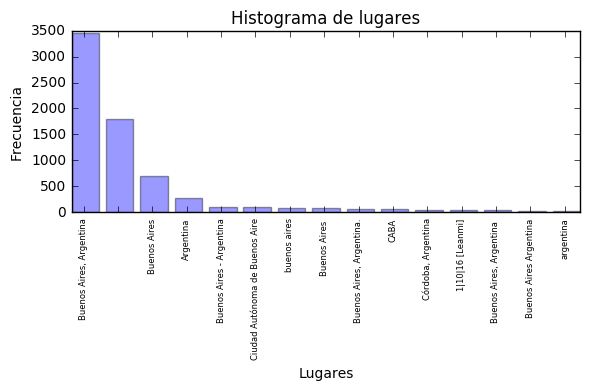

In [6]:
plt.title("Histograma de lugares")
plt.xlabel("Lugares")
plt.ylabel("Frecuencia")

index = np.arange(len(loc.keys()))
bar_width = 0.35


cant = 15
valores = sorted(loc.values(),reverse=True)
claves = sorted(loc, key=loc.get,reverse=True)

opacity = 0.4
plt.xticks(index + bar_width, claves[:cant], size=6, rotation="vertical")
plt.bar(range(cant),valores[:cant],alpha=opacity,color='b',)
plt.tight_layout()
plt.show()

In [7]:
import json
cor = []
for tweet in all_tweets:
    if tweet.user.location == u'': 
        cor.append(tweet)


for c in cor:
    if c.place != None: # o tiene geolocalizacion
        print 'GEO ' + (c._json['place']['name'])
    else:# o la persona de la que retwitteo tiene esa locacion
         print 'RETWEET ' + c.retweeted_status.user.location



RETWEET Buenos Aires
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires
RETWEET Buenos Aires
RETWEET Buenos Aires
GEO Ciudad Autónoma de Buenos Aires
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires
RETWEET Buenos Aires
RETWEET Buenos Aires, Argentina.
RETWEET Buenos Aires, Argentina
GEO Ciudad Autónoma de Buenos Aires
RETWEET Buenos Aires
RETWEET Buenos Aires 
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires
RETWEET Buenos Aires - Argentina
GEO Ciudad Autónoma de Buenos Aires
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires Argentina
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires
RETWEET Buenos Aires
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires, Argentina
RETWEET B

In [8]:
import json
cor = []
for tweet in all_tweets:
    if tweet.user.location == u'Córdoba, Argentina': 
        cor.append(tweet)


for c in cor:
    if c.place != None: # o tiene geolocalizacion
        print 'GEO ' + (c._json['place']['name'])
    else:# o la persona de la que retwitteo tiene esa locacion
         print 'RETWEET ' + c.retweeted_status.user.location



RETWEET Buenos Aires - Argentina
RETWEET Buenos Aires
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires.
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires.
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires
RETWEET Buenos Ai

In [11]:
user = api.get_user(screen_name = 'damianealeman')
print user.location
print user


User(follow_request_sent=None, has_extended_profile=True, profile_use_background_image=True, _json={u'follow_request_sent': None, u'has_extended_profile': True, u'profile_use_background_image': True, u'profile_text_color': u'333333', u'default_profile_image': False, u'id': 3377301250, u'profile_background_image_url_https': u'https://abs.twimg.com/images/themes/theme1/bg.png', u'verified': False, u'translator_type': u'none', u'profile_location': None, u'profile_image_url_https': u'https://pbs.twimg.com/profile_images/621296170053332992/7RyoklBR_normal.jpg', u'profile_sidebar_fill_color': u'DDEEF6', u'entities': {u'description': {u'urls': []}}, u'followers_count': 8, u'profile_sidebar_border_color': u'C0DEED', u'id_str': u'3377301250', u'profile_background_color': u'C0DEED', u'listed_count': 0, u'status': {u'contributors': None, u'truncated': False, u'text': u'A ver ahora asdqasdqasdq', u'is_quote_status': False, u'in_reply_to_status_id': None, u'id': 799030529752526848, u'favorite_coun